# バックテスト用

input:期間、所持金、使用するルール<br>
output:期間中の所持金の増減具合、図とシャープレシオの値<br>

RSI:パラメータ９
ルールベース
ファットテールを直近の数日でどう変化するかから閾値を設定してトレードルールを変更して避ける

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from trading_rule.simple_predict_base_add_train_again import trade
from tqdm.notebook import tqdm

In [2]:
#パラメータ
start = '2016-01-01'
end = '2018-12-31'
posses = {'JPY':10000,'USD':0}

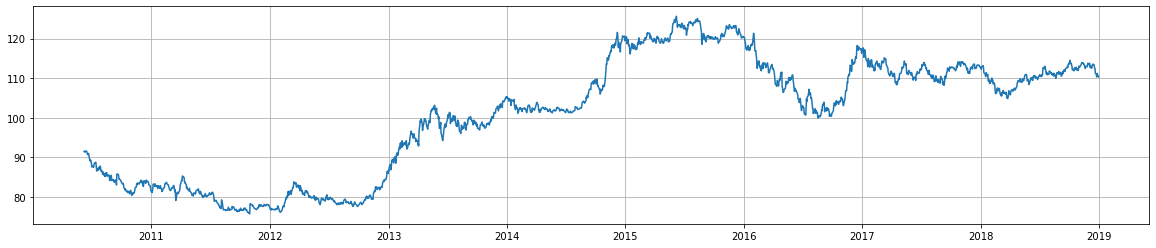

In [3]:
jpy_usd = pd.read_csv('../temp_data/jpy_usd.csv')
jpy_usd.index = pd.to_datetime(jpy_usd['Date'])
del jpy_usd['Date']
jpy_usd = jpy_usd[:end]
plt.figure(figsize=(20,4))
plt.plot(jpy_usd['Close'])
plt.grid()
plt.show()

In [4]:
term_df = jpy_usd[start:end]

In [5]:
import warnings
warnings.simplefilter('ignore')

pos_trans = []
flag = 0
hit_count = 0
trade_count = 0

for i in tqdm(range(len(term_df))):
    current_day = str(term_df.index[i])[:10]
    if flag == 'after_sell':
        posses['JPY'] += (posses['USD']*0.5*jpy_usd.loc[current_day,'Close']*0.9999)
        posses['USD'] = posses['USD']*0.5
        #実際昨日より値が上がったらあたり
        if jpy_usd.loc[:current_day,'Close'][-2] < jpy_usd.loc[:current_day,'Close'][-1]:
            hit_count += 1
        trade_count += 1
            
    elif flag == 'after_buy':
        posses['USD'] += (posses['JPY']*0.5/jpy_usd.loc[current_day,'Close']*0.9999)
        posses['JPY'] = posses['JPY']*0.5
        #実際昨日より値が下がったらあたり
        if jpy_usd.loc[:current_day,'Close'][-2] > jpy_usd.loc[:current_day,'Close'][-1]:
            hit_count += 1
        trade_count += 1
    
    try:
        print(hit_count,trade_count,hit_count/trade_count*100)
    except:
        pass
#     print(current_day,posses,flag)
    posses,flag = trade(current_day=str(term_df.index[i])[:10],posses=posses,df=jpy_usd)
#     print(posses,flag)
    rec = posses.copy()
    rec['current_day'] = str(term_df.index[i])[:10]
    pos_trans.append(rec)
    
pos_trans = pd.DataFrame(pos_trans)

  0%|          | 0/780 [00:00<?, ?it/s]

accuracy: 0.6481481481481481
accuracy: 0.6574074074074074
accuracy: 0.6388888888888888
accuracy: 0.6481481481481481
accuracy: 0.6296296296296297
accuracy: 0.6388888888888888
accuracy: 0.6388888888888888
accuracy: 0.6203703703703703
accuracy: 0.6018518518518519
accuracy: 0.5925925925925926
accuracy: 0.6111111111111112
accuracy: 0.6574074074074074
accuracy: 0.6018518518518519
accuracy: 0.6388888888888888
accuracy: 0.6388888888888888
accuracy: 0.6666666666666666
accuracy: 0.6296296296296297
accuracy: 0.6481481481481481
accuracy: 0.6574074074074074
accuracy: 0.6481481481481481
accuracy: 0.6574074074074074
accuracy: 0.6481481481481481
accuracy: 0.6388888888888888
accuracy: 0.6388888888888888
accuracy: 0.6388888888888888
accuracy: 0.6388888888888888
accuracy: 0.6481481481481481
accuracy: 0.5925925925925926
accuracy: 0.6388888888888888
accuracy: 0.6574074074074074
accuracy: 0.6481481481481481
accuracy: 0.6481481481481481
accuracy: 0.6296296296296297
accuracy: 0.6388888888888888
accuracy: 0.61

accuracy: 0.6296296296296297
3 6 50.0
accuracy: 0.6203703703703703
3 6 50.0
accuracy: 0.6296296296296297
3 6 50.0
accuracy: 0.6481481481481481
3 6 50.0
accuracy: 0.6666666666666666
3 6 50.0
accuracy: 0.6481481481481481
3 6 50.0
accuracy: 0.6296296296296297
3 6 50.0
accuracy: 0.6296296296296297
3 6 50.0
accuracy: 0.6111111111111112
3 6 50.0
accuracy: 0.6203703703703703
3 6 50.0
accuracy: 0.6666666666666666
3 6 50.0
accuracy: 0.6944444444444444
3 6 50.0
accuracy: 0.6666666666666666
3 6 50.0
accuracy: 0.7037037037037037
3 7 42.857142857142854
accuracy: 0.6481481481481481
3 7 42.857142857142854
accuracy: 0.6759259259259259
3 7 42.857142857142854
accuracy: 0.6759259259259259
3 7 42.857142857142854
accuracy: 0.7037037037037037
4 8 50.0
accuracy: 0.6851851851851852
4 8 50.0
accuracy: 0.6666666666666666
4 8 50.0
accuracy: 0.6388888888888888
4 8 50.0
accuracy: 0.6574074074074074
4 8 50.0
accuracy: 0.6759259259259259
4 8 50.0
accuracy: 0.6944444444444444
4 8 50.0
accuracy: 0.6574074074074074
4 8

accuracy: 0.6018518518518519
5 9 55.55555555555556
accuracy: 0.6759259259259259
5 9 55.55555555555556
accuracy: 0.6574074074074074
5 9 55.55555555555556
accuracy: 0.6111111111111112
5 9 55.55555555555556
accuracy: 0.6111111111111112
5 9 55.55555555555556
accuracy: 0.6111111111111112
5 9 55.55555555555556
accuracy: 0.6481481481481481
5 9 55.55555555555556
accuracy: 0.6111111111111112
5 9 55.55555555555556
accuracy: 0.6018518518518519
5 9 55.55555555555556
accuracy: 0.6111111111111112
5 9 55.55555555555556
accuracy: 0.6111111111111112
5 9 55.55555555555556
accuracy: 0.6203703703703703
5 9 55.55555555555556
accuracy: 0.6203703703703703
5 9 55.55555555555556
accuracy: 0.5833333333333334
5 9 55.55555555555556
accuracy: 0.6018518518518519
5 9 55.55555555555556
accuracy: 0.6296296296296297
5 9 55.55555555555556
accuracy: 0.5925925925925926
5 9 55.55555555555556
accuracy: 0.6388888888888888
5 9 55.55555555555556
accuracy: 0.6296296296296297
5 9 55.55555555555556
accuracy: 0.5925925925925926
5 

accuracy: 0.6203703703703703
5 9 55.55555555555556
accuracy: 0.6203703703703703
5 9 55.55555555555556
accuracy: 0.6574074074074074
5 9 55.55555555555556
accuracy: 0.6759259259259259
5 9 55.55555555555556
accuracy: 0.6759259259259259
5 9 55.55555555555556
accuracy: 0.6666666666666666
5 9 55.55555555555556
accuracy: 0.6388888888888888
5 9 55.55555555555556
accuracy: 0.6296296296296297
5 9 55.55555555555556
accuracy: 0.6481481481481481
5 9 55.55555555555556
accuracy: 0.6481481481481481
5 9 55.55555555555556
accuracy: 0.6296296296296297
5 9 55.55555555555556
accuracy: 0.6388888888888888
5 9 55.55555555555556
accuracy: 0.6111111111111112
5 9 55.55555555555556
accuracy: 0.6574074074074074
5 9 55.55555555555556
accuracy: 0.6296296296296297
5 9 55.55555555555556
accuracy: 0.6481481481481481
5 9 55.55555555555556
accuracy: 0.7037037037037037
6 10 60.0
accuracy: 0.6481481481481481
6 10 60.0
accuracy: 0.6574074074074074
6 10 60.0
accuracy: 0.6296296296296297
6 10 60.0
accuracy: 0.6574074074074074

accuracy: 0.7222222222222222
28 59 47.45762711864407
accuracy: 0.7222222222222222
29 60 48.333333333333336
accuracy: 0.7129629629629629
30 61 49.18032786885246
accuracy: 0.6666666666666666
30 61 49.18032786885246
accuracy: 0.75
31 62 50.0
accuracy: 0.6851851851851852
31 62 50.0
accuracy: 0.7129629629629629
31 63 49.2063492063492
accuracy: 0.7129629629629629
32 64 50.0
accuracy: 0.7222222222222222
32 65 49.23076923076923
accuracy: 0.75
33 66 50.0
accuracy: 0.7685185185185185


In [6]:
hit_count

33

In [7]:
trade_count

66

In [8]:
pos_trans.index = pd.to_datetime(pos_trans['current_day'])
del pos_trans['current_day']

In [9]:
df = pd.concat([pos_trans,jpy_usd],axis=1)

In [10]:
df['JPY_POS'] = df['USD']*df['Close']+df['JPY']

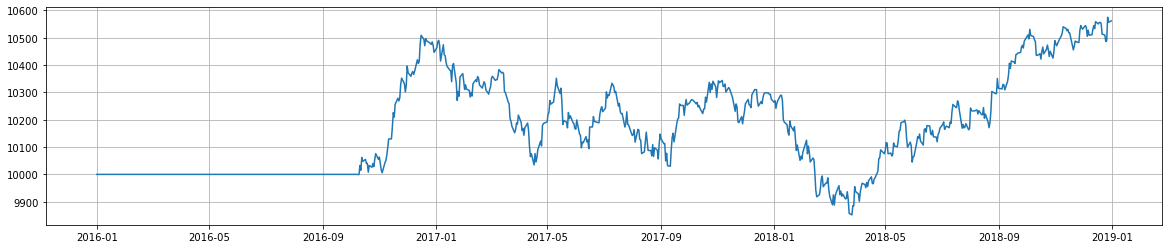

In [11]:
plt.figure(figsize=(20,4))
plt.plot(df['JPY_POS'])
plt.grid()
plt.show()

In [12]:
df = df.dropna()

In [13]:
df['base_pos'] = df['Close']/df.iloc[0,5]*10000

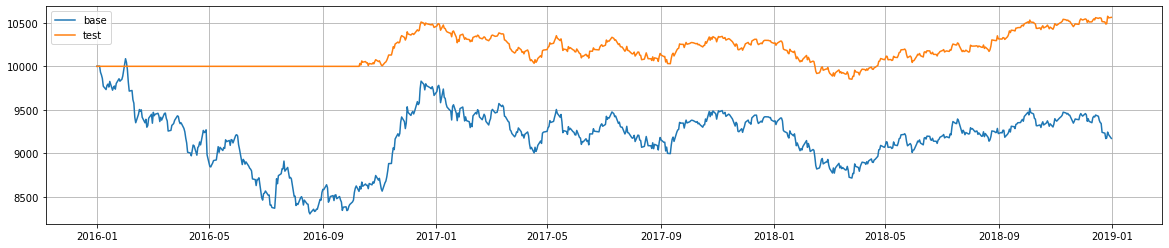

In [14]:
plt.figure(figsize=(20,4))
plt.plot(df['base_pos'])
plt.plot(df['JPY_POS'])
plt.legend(['base','test'])
plt.grid()
plt.show()

In [15]:
df['JPY_POS'].std()/10000

(df['JPY_POS'].mean()-10000)/10000

risk = df['JPY_POS'].std()/10000

ret = (df['JPY_POS'].mean()-10000)/10000

base_ret = (df['base_pos'].mean()-10000)/10000

(ret-base_ret)/risk

0.017309357615821266

In [21]:
jpy_usd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-07,91.570000,92.064003,90.989998,91.515999,91.515999,0
2010-06-08,91.489998,91.906998,90.885002,91.410004,91.410004,0
2010-06-09,91.410004,91.654999,91.040001,91.364998,91.364998,0
2010-06-10,91.320999,91.441002,90.855003,91.308998,91.308998,0
2010-06-11,91.331001,91.755997,91.262001,91.620003,91.620003,0
...,...,...,...,...,...,...
2018-12-25,110.314003,110.344002,109.990997,110.310997,110.310997,0
2018-12-26,110.431000,110.697998,110.286003,110.402000,110.402000,0
2018-12-27,111.221001,111.222000,110.653000,111.206001,111.206001,0


In [22]:
_,flag = trade(current_day=current_day,posses=posses,df=jpy_usd)

accuracy: 0.7685185185185185
